**Installing necessary libraries**

In [ ]:
!pip install

## Data Set Loading

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [3]:
import pandas as pd
import os

# list the directories available in the path
file_path = os.listdir(path)
print(file_path)

# connecting the path for the final path
csv_path = file_path[0]
data_path = os.path.join(path,csv_path)

# Load the csv
data = pd.read_csv(data_path)

#display top 5 rows
print(data.head())

['heart_disease_uci.csv']
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4         

In [4]:
# dataset summary
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Data Pre prossesing


In [5]:
# checking the missing values\
data.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [33]:
# Remove unwanted columns and replace the null values
df = data.drop(columns=['id','slope','ca','thal','dataset'])

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


# Filling NA values with mean and median for numerical data
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())


# Filling Na values with mode for categorical data
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


# Checking the NA values
df.isna().sum()

/tmp/ipython-input-2826329588.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
/tmp/ipython-input-2826329588.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [34]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.553261
std,9.424685,18.443895,108.957634,25.138494,1.053774,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,138.000000,0.800000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


## EDA

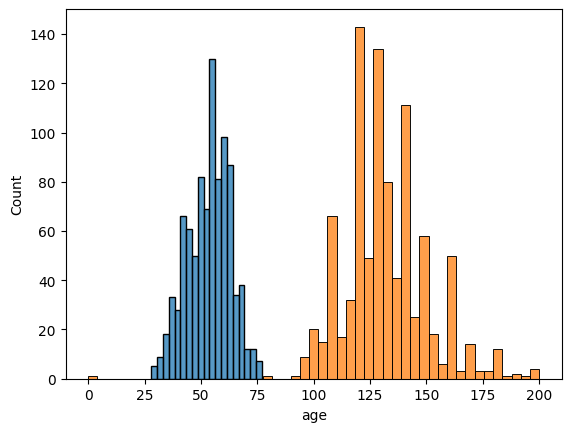

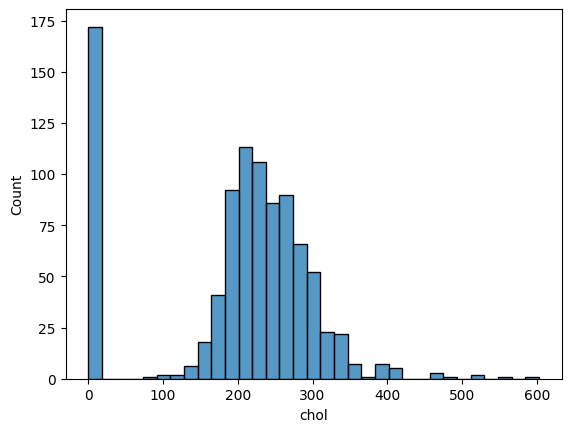

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA for the Numerical data
sns.histplot(df['age'])
sns.histplot(df['trestbps'])
plt.show()
sns.histplot(df['chol'])
plt.show()

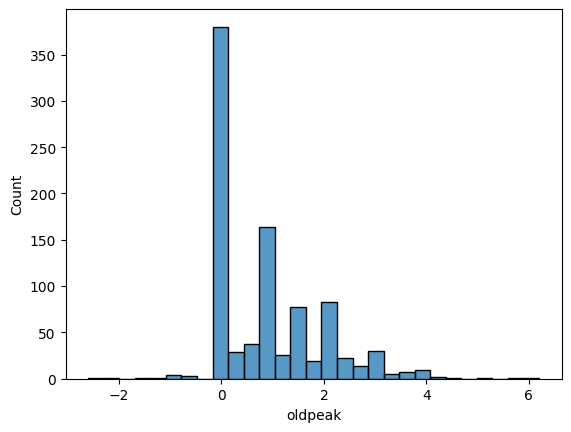

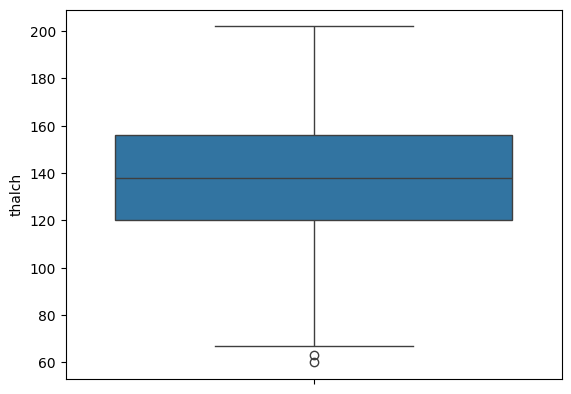

In [36]:
sns.histplot(df['oldpeak'])
plt.show()
sns.boxplot(df['thalch'])
plt.show()

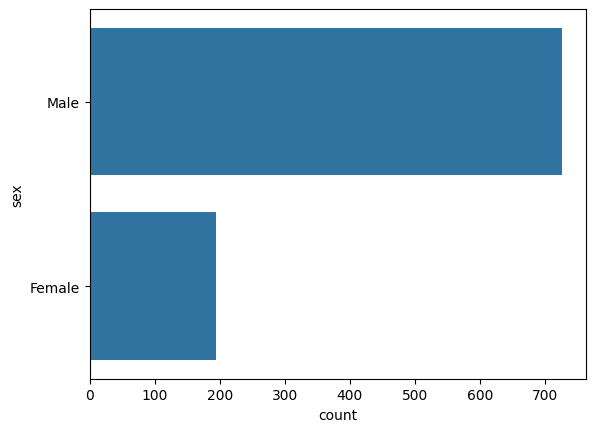

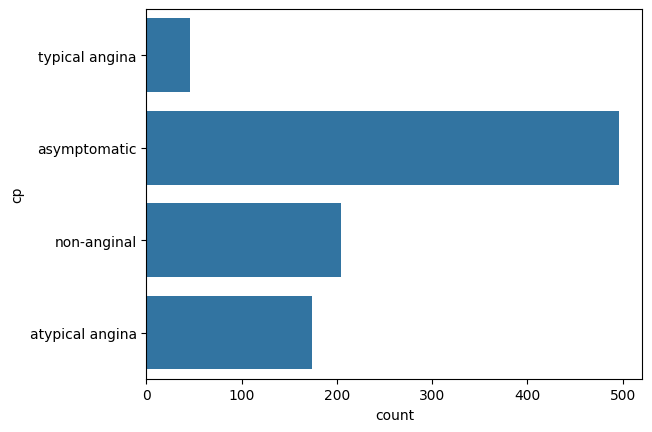

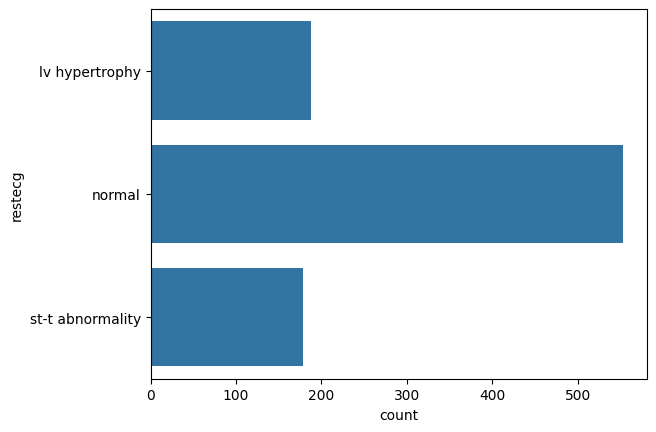

In [37]:
# EDA for the categorical data
sns.countplot(df['sex'])
plt.show()
sns.countplot(df['cp'])
plt.show()
sns.countplot(df['restecg'])
plt.show()

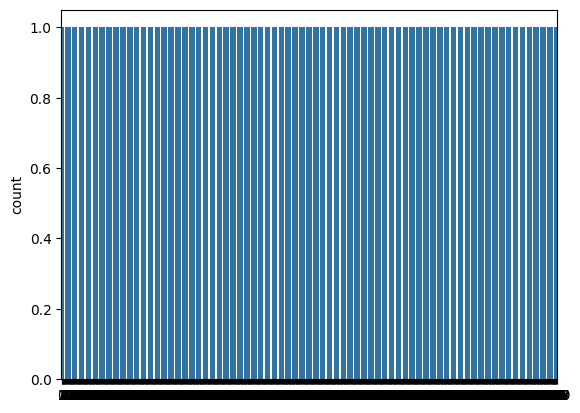

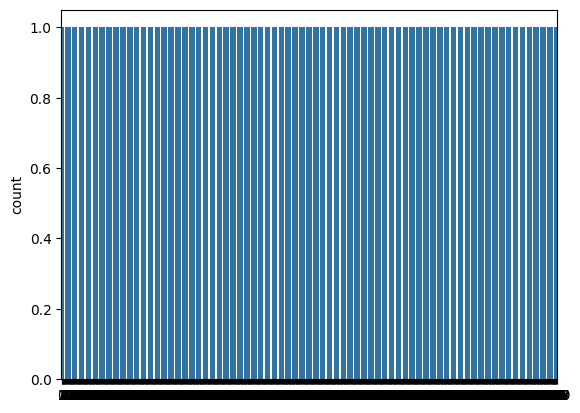

In [38]:
sns.countplot(df['exang'])
plt.show()
sns.countplot(df['num'])
plt.show()

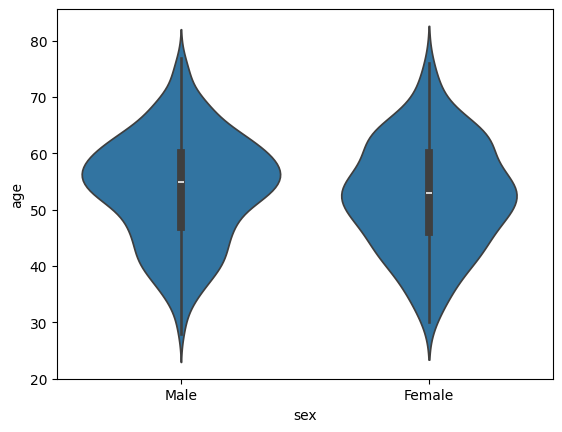

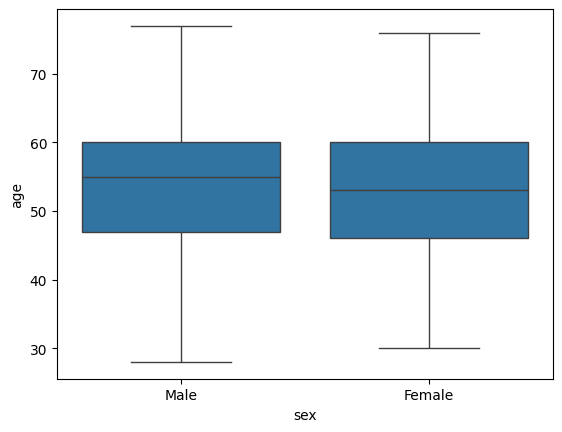

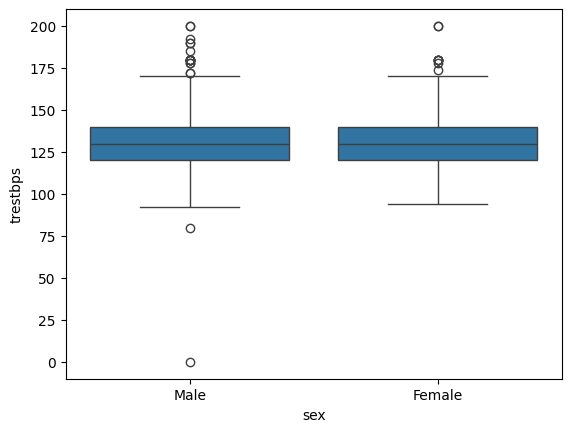

In [39]:
# plot for numerical vs categorical
sns.violinplot(x='sex', y='age', data=df)
plt.show()
sns.boxplot(x='sex', y='age', data=df)
plt.show()
sns.boxplot(x='sex', y='trestbps', data=df)
plt.show()

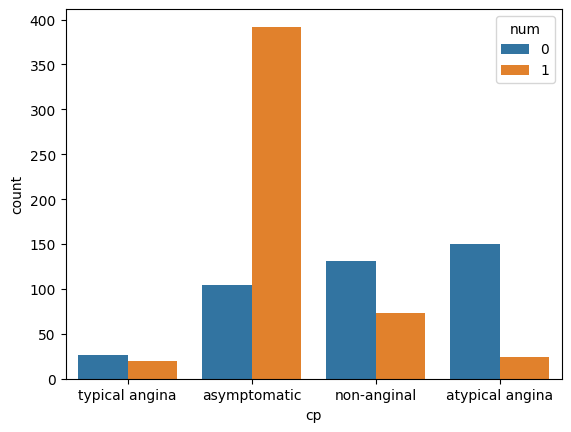

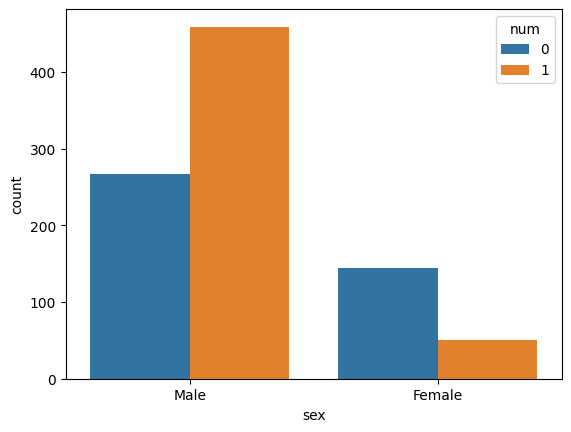

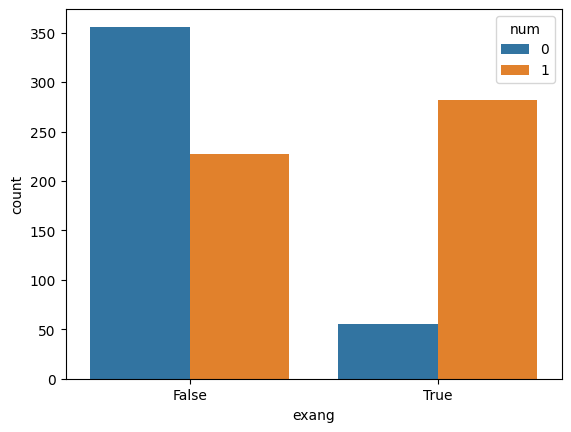

In [40]:
# Categorical Feature vs Target
sns.countplot(x='cp', hue='num', data=df)
plt.show()
sns.countplot(x='sex', hue='num', data=df)
plt.show()
sns.countplot(x='exang', hue='num', data=df)
plt.show()

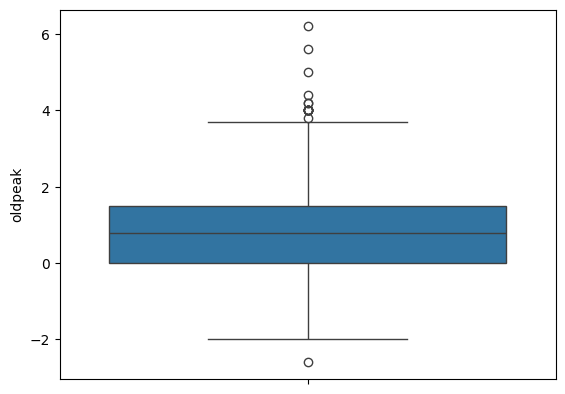

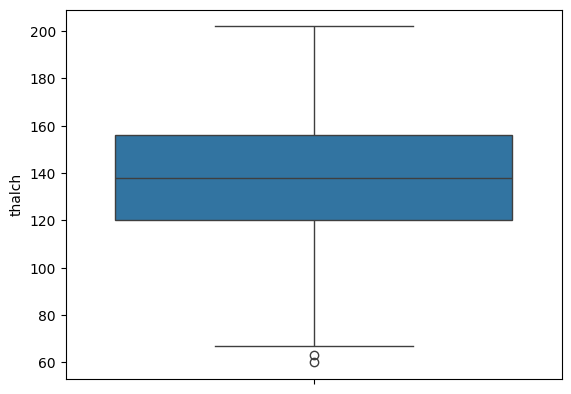

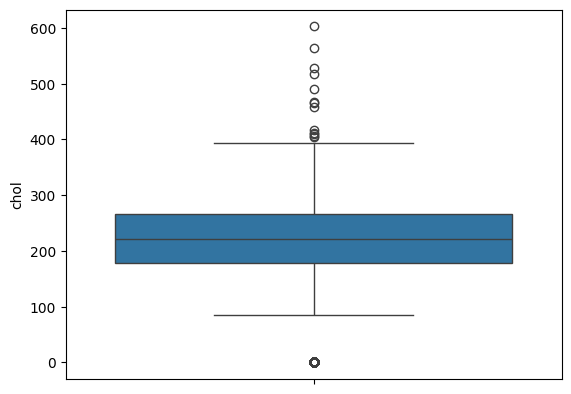

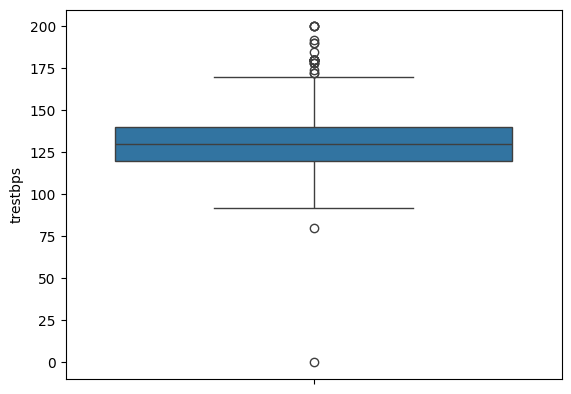

In [41]:
# checking for the Outliers using boxplot
sns.boxplot(df['oldpeak'])
plt.show()
sns.boxplot(df['thalch'])
plt.show()
sns.boxplot(df['chol'])
plt.show()
sns.boxplot(df['trestbps'])
plt.show()

# NOTE: no need to remove Outliers in the medical data as they are possible values in some cases
# remove outlies like heart rate = 0 , colestrol = 0 because thus are not possible values

# i choose not to remove them too

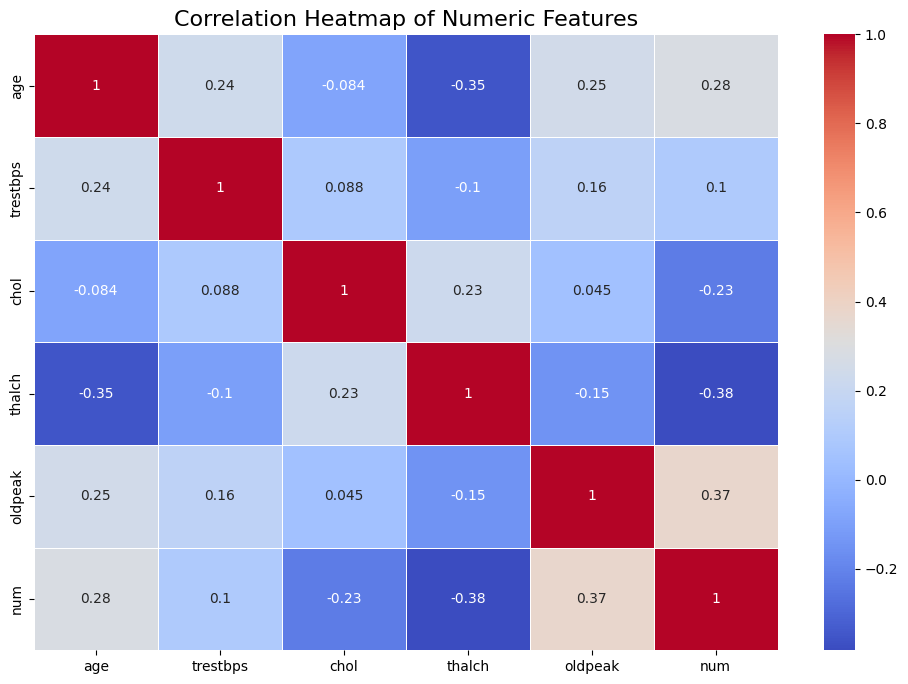

In [42]:
# correlation
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features (important for corr matrix)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 1. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


## Spit the data


In [43]:
# Defining the dependent and independent feature to use for the model training
X = df.drop('num',axis = 1)
y = df['num']
print(X.head())
print(y.head())

   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak  
0   150.0  False      2.3  
1   108.0   True      1.5  
2   129.0   True      2.6  
3   187.0  False      3.5  
4   172.0  False      1.4  
0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64


In [44]:
# spliting data into train, test , validation by 70-15-15

import numpy as np
from sklearn.model_selection import train_test_split

# Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.30, stratify=y, random_state = 42)


# Split Temp (30%) into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.50, stratify=y_temp, random_state=42)

## Feature converesion categorical to numerical

In [56]:
# checking the numerical and categorical columns
# Define numerical and categorical columns based on X, which is the feature set
numerical_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object','category']).columns

print("Numerical columns for X:", numerical_cols)
print("Categorical columns for X:", categorical_cols)

categorical_cols = ['sex', 'cp', 'restecg', 'fbs', 'exang']


# Create the preprocessing transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# convert numerice to standard scale for better understanding of the range to the machine
# convert the categorical to numerical

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

Numerical columns for X: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')
Categorical columns for X: Index(['sex', 'cp', 'restecg'], dtype='object')


## Building Pipeline and model training

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Buildin the pipeline so that it will look more professional
# NOTE : using a Pipeline is the better approach because it prevents data leakage and ensures the same transformations are applied during training and prediction. It is the recommended and industry-standard method
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])


# Fit the pipeline on training data
model_pipeline.fit(X_train,y_train)


# Evaluation on trainning data
y_pred = model_pipeline.predict(X_test)

In [58]:
# model evaluation matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

print("RandomForestClassifier Accuracy : ", accuracy_score(y_test,y_pred))
# print("\nPrecision : ", precision_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nclassification Report:\n ", classification_report(y_test, y_pred))

RandomForestClassifier Accuracy :  0.7681159420289855

Confusion Matrix : 
 [[49 13]
 [19 57]]

classification Report:
                precision    recall  f1-score   support

           0       0.72      0.79      0.75        62
           1       0.81      0.75      0.78        76

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



In [63]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Buildin the pipeline so that it will look more professional
# NOTE : using a Pipeline is the better approach because it prevents data leakage and ensures the same transformations are applied during training and prediction. It is the recommended and industry-standard method
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


# Fit the pipeline on training data
model_pipeline.fit(X_train,y_train)


# Evaluation on trainning data
y_pred = model_pipeline.predict(X_test)
# model evaluation matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

print("LogisticRegression Accuracy : ", accuracy_score(y_test,y_pred))
# print("\nPrecision : ", precision_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nclassification Report:\n ", classification_report(y_test, y_pred))

LogisticRegression Accuracy :  0.8043478260869565

Confusion Matrix : 
 [[50 12]
 [15 61]]

classification Report:
                precision    recall  f1-score   support

           0       0.77      0.81      0.79        62
           1       0.84      0.80      0.82        76

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.81      0.80      0.80       138



In [60]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Buildin the pipeline so that it will look more professional
# NOTE : using a Pipeline is the better approach because it prevents data leakage and ensures the same transformations are applied during training and prediction. It is the recommended and industry-standard method
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'  # avoids warning
    ))
])


# Fit the pipeline on training data
model_pipeline.fit(X_train,y_train)


# Evaluation on trainning data
y_pred = model_pipeline.predict(X_test)

# model evaluation matrix
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

print("XGBClassifier Accuracy : ", accuracy_score(y_test,y_pred))
# print("\nPrecision : ", precision_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nclassification Report:\n ", classification_report(y_test, y_pred))

XGBClassifier Accuracy :  0.7898550724637681

Confusion Matrix : 
 [[50 12]
 [17 59]]

classification Report:
                precision    recall  f1-score   support

           0       0.75      0.81      0.78        62
           1       0.83      0.78      0.80        76

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



In [64]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.74456522 0.73369565 0.88043478 0.85326087 0.67391304]
Mean accuracy: 0.7771739130434783


## Hyperparameter Tuning


In [66]:
# imports needed
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [67]:
# Hyperpara for logistic
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000))
])

log_reg_params = {
    'model__C': [0.01, 0.1, 1, 5, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

log_reg_grid = GridSearchCV(
    log_reg_pipeline,
    log_reg_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Score:", log_reg_grid.best_score_)
print("Best Parameters:", log_reg_grid.best_params_)

Best Logistic Regression Score: 0.8058502906976743
Best Parameters: {'model__C': 0.1, 'model__solver': 'liblinear'}


In [68]:
# Hyperpara for Random forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Random Forest Score:", rf_grid.best_score_)
print("Best Parameters:", rf_grid.best_params_)


Best Random Forest Score: 0.8244912790697676
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [69]:
# Hyperpara for the XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False
    ))
])

xgb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb_pipeline,
    xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print("Best XGBoost Score:", xgb_grid.best_score_)
print("Best Parameters:", xgb_grid.best_params_)


Best XGBoost Score: 0.8306686046511628
Best Parameters: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 1.0}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:48:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
# training the XGBoost with the best hyper parameters

final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.01,
        max_depth=3,
        subsample=1.0,
        colsample_bytree=0.7,
        random_state=42
    ))
])

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Final Test Accuracy: 0.7898550724637681

Confusion Matrix:
 [[49 13]
 [16 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        62
           1       0.82      0.79      0.81        76

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



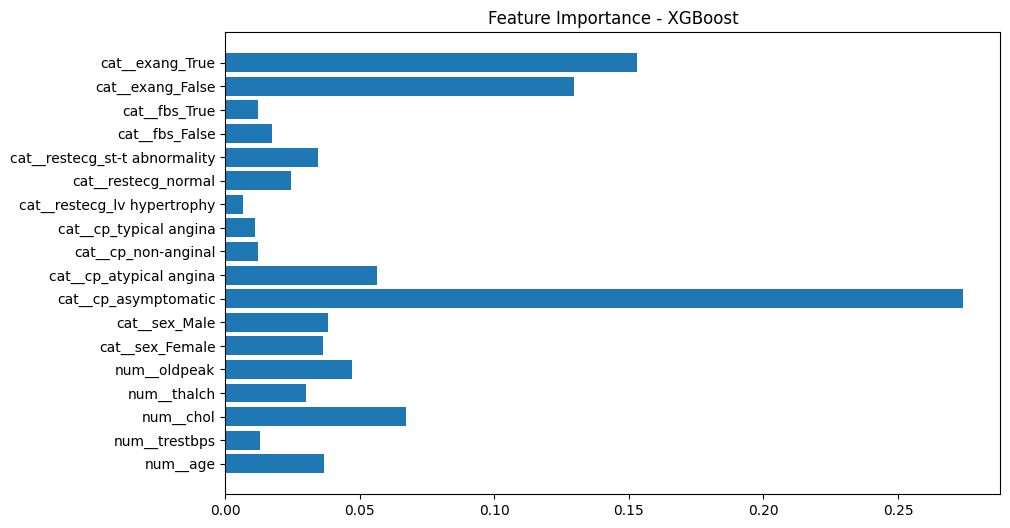

In [76]:
# Feature Importance / Explainability

xgb = final_model.named_steps['model']
importances = xgb.feature_importances_

# Get feature names from the preprocessor
# The preprocessor itself has a get_feature_names_out method
# which correctly combines names from all its transformers.
feature_names = final_model.named_steps['preprocessor'].get_feature_names_out()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance - XGBoost")
plt.show()

## saving the model


In [ ]:
# model saved in .pkl file as the models used are sklearn models
import joblib
joblib.dump(final_model, "heart_disease_xgb_model.pkl")

['heart_disease_xgb_model.pkl']